# Визуализация данных. Анализ.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('fishes.csv')
df.head()

,Unnamed: 0,rfmo_id,rfmo_name,layer_name,year,scientific_name,common_name,functional_group,commercial_group,fishing_entity,sector_type,catch_status,reporting_status,gear_name,catch_sum,real_value
0,0,12,NEAFC,rfmo,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Belgium,Industrial,Discards,Unreported,bottom trawl,1082.915358,1.587554e+06
1,1,12,NEAFC,rfmo,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Belgium,Industrial,Discards,Unreported,shrimp trawl,112.044683,1.642575e+05
2,2,12,NEAFC,rfmo,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Belgium,Industrial,Discards,Unreported,beam trawl,1937.004283,2.839648e+06
3,3,12,NEAFC,rfmo,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Belgium,Industrial,Discards,Unreported,otter trawl,103.114690,1.511661e+05
4,4,12,NEAFC,rfmo,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Belgium,Industrial,Discards,Unreported,pelagic trawl,0.657854,9.644143e+02


In [3]:
df.corr()

,Unnamed: 0,rfmo_id,year,catch_sum,real_value
Unnamed: 0,1.000000,NaN,0.993562,-0.019139,-0.007082
rfmo_id,NaN,NaN,NaN,NaN,NaN
year,0.993562,NaN,1.000000,-0.018144,-0.006586
catch_sum,-0.019139,NaN,-0.018144,1.000000,0.736292
real_value,-0.007082,NaN,-0.006586,0.736292,1.000000


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084102 entries, 0 to 1084101
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1084102 non-null  int64  
 1   rfmo_id           1084102 non-null  int64  
 2   rfmo_name         1084102 non-null  object 
 3   layer_name        1084102 non-null  object 
 4   year              1084102 non-null  int64  
 5   scientific_name   1084102 non-null  object 
 6   common_name       1084102 non-null  object 
 7   functional_group  1084102 non-null  object 
 8   commercial_group  1084102 non-null  object 
 9   fishing_entity    1084102 non-null  object 
 10  sector_type       1084102 non-null  object 
 11  catch_status      1084102 non-null  object 
 12  reporting_status  1084102 non-null  object 
 13  gear_name         1084102 non-null  object 
 14  catch_sum         1084102 non-null  float64
 15  real_value        1084102 non-null  float64
dtype

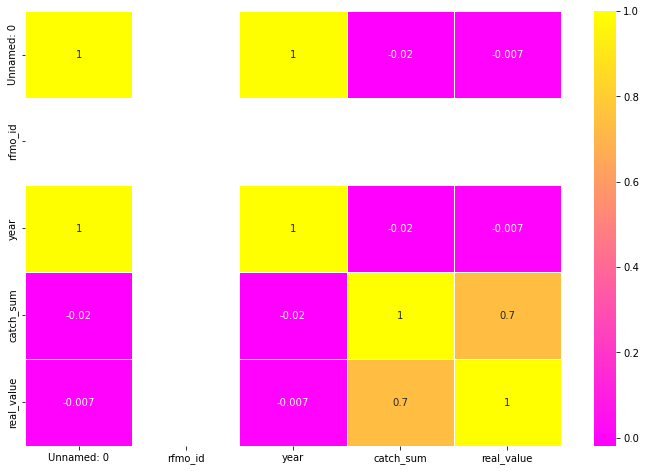

In [5]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(),  annot=True, fmt='.1g', cmap = 'spring', linewidths=.5, ax=ax);

**Микровыводы:** построили тепловую матрицу корреляций числовых характеристик наших данных, выяснили, что есть прямая положительная линейная связь между суммой пойманных рыб и их реальным денежным выражением в долларах. Остальные связи слабые.

# Анализ по функциональным группам рыб

In [6]:
df['functional_group'].value_counts()

Medium demersals (30 - 89 cm)           127300
Large demersals (>=90 cm)               119577
Small to medium flatfishes (<90 cm)     114323
Medium benthopelagics (30 - 89 cm)      105217
Medium pelagics (30 - 89 cm)             84615
Other demersal invertebrates             80904
Large benthopelagics (>=90 cm)           74187
Lobsters, crabs                          59097
Large sharks (>=90 cm)                   47499
Large flatfishes (>=90 cm)               46929
Shrimps                                  30792
Cephalopods                              27814
Small pelagics (<30 cm)                  23851
Large rays (>=90 cm)                     23784
Large pelagics (>=90 cm)                 18177
Large reef assoc. fish (>=90 cm)         17273
Medium bathydemersals (30 - 89 cm)       15233
Medium reef assoc. fish (30 - 89 cm)     14610
Large bathydemersals (>=90 cm)           14230
Small to medium rays (<90 cm)            13409
Small to medium sharks (<90 cm)           6726
Medium bathyp

Всего 30 функциональных групп.

C:\Users\08DE~1\AppData\Local\Temp/ipykernel_10376/3519972669.py:18: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout()


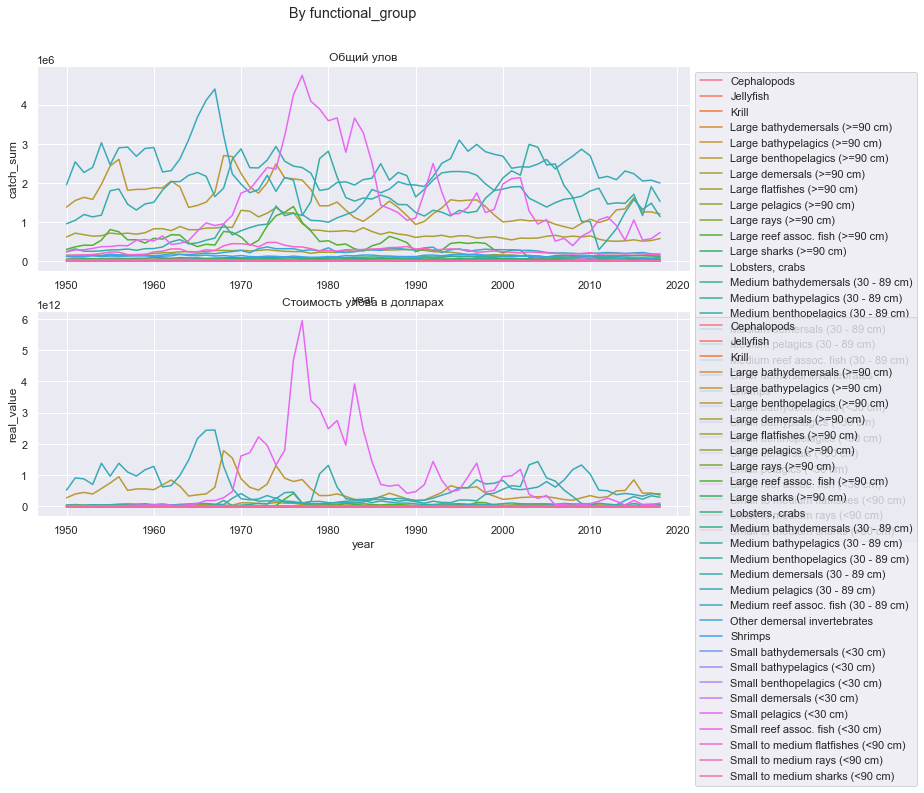

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
s_dev= df.groupby(["functional_group", "year"]).sum().reset_index()
fig, axes = plt.subplots(2, 1)
fig.suptitle('By functional_group')


sns.lineplot(ax=axes[0], data=s_dev, x ="year", y="catch_sum", hue= 'functional_group')
axes[0].set_title('Общий улов')

axes[0].legend(bbox_to_anchor=(1, 1))

sns.lineplot(ax=axes[1],data=s_dev, x ="year", y="real_value", hue= 'functional_group')
axes[1].set_title('Стоимость улова в долларах')

axes[1].legend(bbox_to_anchor=(1, 1))


fig.tight_layout()
  

plt.show()

In [8]:
s=df['functional_group'].value_counts().nlargest(10)
sdata=df[df['functional_group'].isin(s.index)]
sdata #только 10 самых часто вылавливаемых рыб

,Unnamed: 0,rfmo_id,rfmo_name,layer_name,year,scientific_name,common_name,functional_group,commercial_group,fishing_entity,sector_type,catch_status,reporting_status,gear_name,catch_sum,real_value
0,0,12,NEAFC,rfmo,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Belgium,Industrial,Discards,Unreported,bottom trawl,1082.915358,1.587554e+06
1,1,12,NEAFC,rfmo,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Belgium,Industrial,Discards,Unreported,shrimp trawl,112.044683,1.642575e+05
2,2,12,NEAFC,rfmo,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Belgium,Industrial,Discards,Unreported,beam trawl,1937.004283,2.839648e+06
3,3,12,NEAFC,rfmo,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Belgium,Industrial,Discards,Unreported,otter trawl,103.114690,1.511661e+05
4,4,12,NEAFC,rfmo,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Belgium,Industrial,Discards,Unreported,pelagic trawl,0.657854,9.644143e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084097,1084097,12,NEAFC,rfmo,2018,Donax trunculus,Truncate donax,Other demersal invertebrates,Molluscs,Spain,Artisanal,Landings,Reported,artisanal fishing gear,0.012357,3.617894e-01
1084098,1084098,12,NEAFC,rfmo,2018,Nassarius mutabilis,Changeable nassa,Other demersal invertebrates,Molluscs,Spain,Artisanal,Discards,Unreported,artisanal fishing gear,0.000093,1.366447e-01
1084099,1084099,12,NEAFC,rfmo,2018,Nassarius mutabilis,Changeable nassa,Other demersal invertebrates,Molluscs,Spain,Artisanal,Landings,Reported,artisanal fishing gear,0.002191,1.637576e-02
1084100,1084100,12,NEAFC,rfmo,2018,Nassarius mutabilis,Changeable nassa,Other demersal invertebrates,Molluscs,Spain,Artisanal,Landings,Reported,artisanal fishing gear,0.000001,4.102140e-09


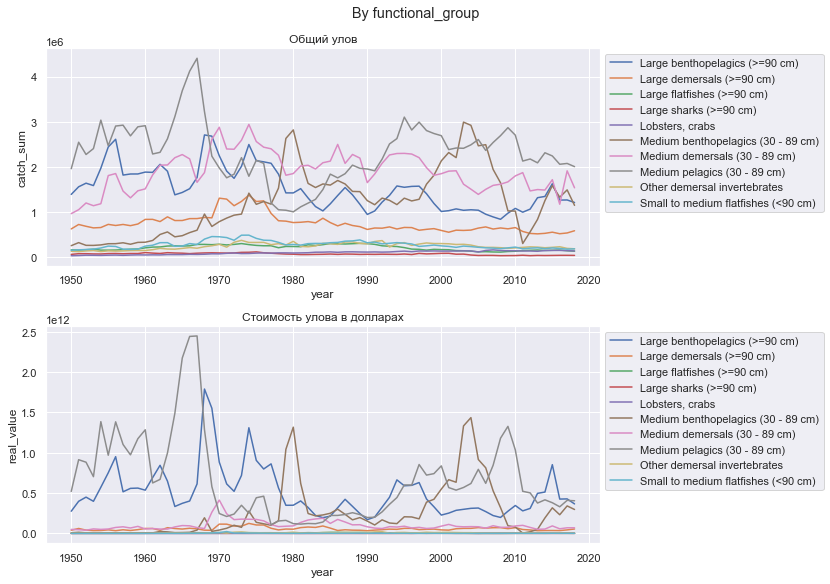

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
s_dav= sdata.groupby(["functional_group", "year"]).sum().reset_index()
fig, axes = plt.subplots(2, 1)
fig.suptitle('By functional_group')


sns.lineplot(ax=axes[0], data=s_dav, x ="year", y="catch_sum", hue= 'functional_group')
axes[0].set_title('Общий улов')

axes[0].legend(bbox_to_anchor=(1, 1))

sns.lineplot(ax=axes[1],data=s_dav, x ="year", y="real_value", hue= 'functional_group')
axes[1].set_title('Стоимость улова в долларах')

axes[1].legend(bbox_to_anchor=(1, 1))


fig.tight_layout()
  

plt.show()

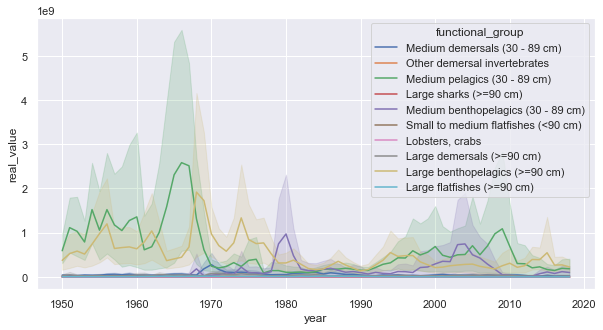

In [10]:
f, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=sdata, x='year', y='real_value', hue='functional_group');
plt.show();

**Микровывод:** в ходе аналитики 10 самых часто вылавливаемых рыб и морских продуктов стало ясно,что в основном диапазон количества вылова всех видов за 70 лет не особо изменился - да, есть опредленные скачки роста и спада, но средняя динамика держится на среднем уровне. 

Что касается улова в стоимостном денежном выражении, то в 1960-ые заметен рост ценового спроса на среднеразмерные и крупноразменые камбалы (benthopelagic) , но затем динамика снижается и цены по всем группам выравниваются в одном ценовом диапазоне. 

# Анализ по странам вылова

In [11]:
df['fishing_entity'].value_counts()

Spain                             179814
France                            173732
United Kingdom                    154641
Sweden                            121327
Portugal                           67225
Ireland                            66711
Denmark                            63248
Iceland                            48377
Faeroe Isl. (Denmark)              32536
Norway                             29642
Channel Isl. (UK)                  28170
Belgium                            24712
Russian Federation                 24536
Germany                            19045
Greenland                          18414
Azores Isl. (Portugal)             13743
Netherlands                        10882
Estonia                             1547
Lithuania                           1401
Latvia                              1319
Taiwan                               548
Unknown Fishing Country              422
Japan                                287
Poland                               285
Korea (South)   

Всего 60 значений.

C:\Users\08DE~1\AppData\Local\Temp/ipykernel_10376/208407956.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


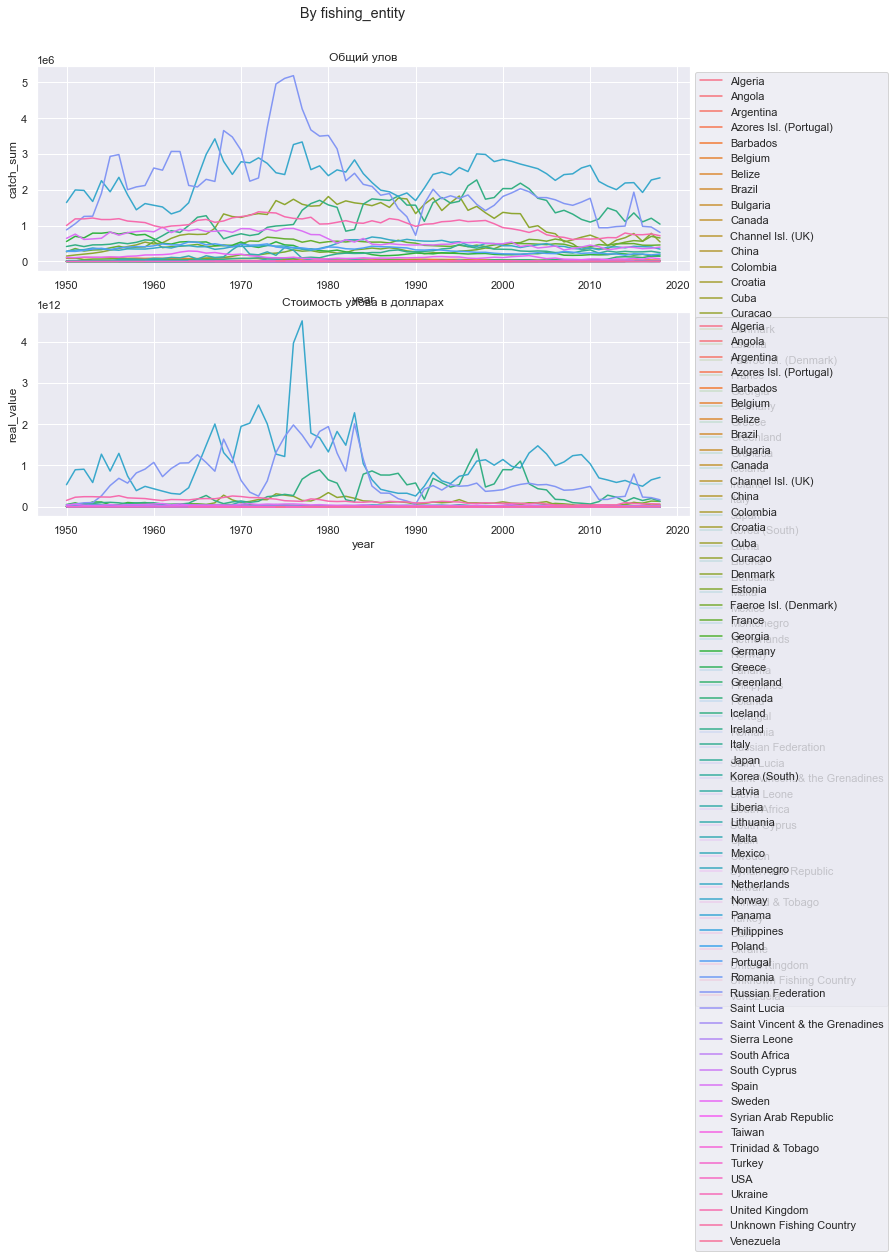

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
s_dev= df.groupby(["fishing_entity", "year"]).sum().reset_index()
fig, axes = plt.subplots(2, 1)
fig.suptitle('By fishing_entity')


sns.lineplot(ax=axes[0], data=s_dev, x ="year", y="catch_sum", hue= 'fishing_entity')
axes[0].set_title('Общий улов')

axes[0].legend(bbox_to_anchor=(1, 1))

sns.lineplot(ax=axes[1],data=s_dev, x ="year", y="real_value", hue= 'fishing_entity')
axes[1].set_title('Стоимость улова в долларах')

axes[1].legend(bbox_to_anchor=(1, 1))


fig.tight_layout()
  

plt.show()

In [13]:
f=df['fishing_entity'].value_counts().nlargest(10)
fdata=df[df['fishing_entity'].isin(f.index)]
fdata #только 10 стран, где чаще всего ловят рыбу

,Unnamed: 0,rfmo_id,rfmo_name,layer_name,year,scientific_name,common_name,functional_group,commercial_group,fishing_entity,sector_type,catch_status,reporting_status,gear_name,catch_sum,real_value
32,32,12,NEAFC,rfmo,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Denmark,Industrial,Discards,Unreported,unknown by source,8.876867,1.301349e+04
33,33,12,NEAFC,rfmo,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Denmark,Industrial,Landings,Reported,pelagic trawl,104.364830,1.529988e+05
34,34,12,NEAFC,rfmo,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Denmark,Industrial,Landings,Reported,purse seine,59.771011,8.762430e+04
35,35,12,NEAFC,rfmo,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Denmark,Industrial,Landings,Reported,mixed gear,1.467143,2.150832e+03
36,36,12,NEAFC,rfmo,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Denmark,Industrial,Landings,Reported,unknown class,0.397016,5.820253e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084097,1084097,12,NEAFC,rfmo,2018,Donax trunculus,Truncate donax,Other demersal invertebrates,Molluscs,Spain,Artisanal,Landings,Reported,artisanal fishing gear,0.012357,3.617894e-01
1084098,1084098,12,NEAFC,rfmo,2018,Nassarius mutabilis,Changeable nassa,Other demersal invertebrates,Molluscs,Spain,Artisanal,Discards,Unreported,artisanal fishing gear,0.000093,1.366447e-01
1084099,1084099,12,NEAFC,rfmo,2018,Nassarius mutabilis,Changeable nassa,Other demersal invertebrates,Molluscs,Spain,Artisanal,Landings,Reported,artisanal fishing gear,0.002191,1.637576e-02
1084100,1084100,12,NEAFC,rfmo,2018,Nassarius mutabilis,Changeable nassa,Other demersal invertebrates,Molluscs,Spain,Artisanal,Landings,Reported,artisanal fishing gear,0.000001,4.102140e-09


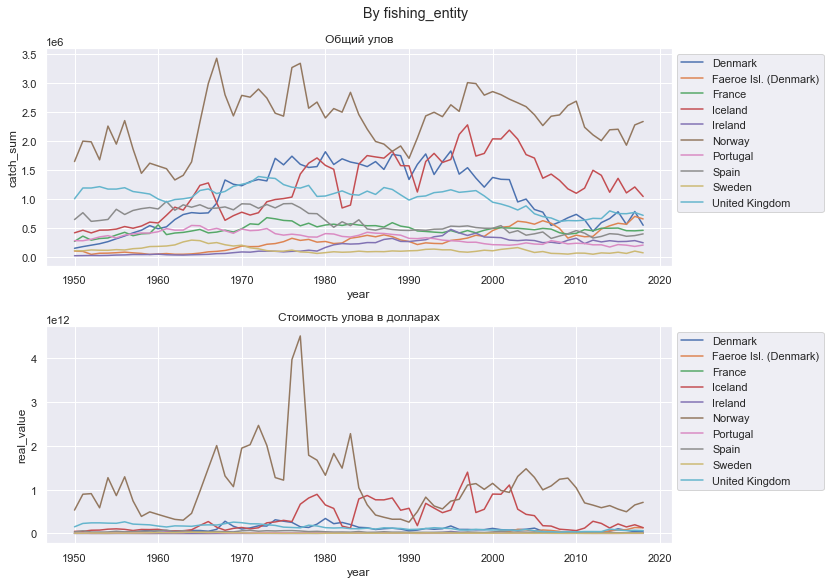

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
f_dav= fdata.groupby(["fishing_entity", "year"]).sum().reset_index()
fig, axes = plt.subplots(2, 1)
fig.suptitle('By fishing_entity')


sns.lineplot(ax=axes[0], data=f_dav, x ="year", y="catch_sum", hue= 'fishing_entity')
axes[0].set_title('Общий улов')

axes[0].legend(bbox_to_anchor=(1, 1))

sns.lineplot(ax=axes[1],data=f_dav, x ="year", y="real_value", hue= 'fishing_entity')
axes[1].set_title('Стоимость улова в долларах')

axes[1].legend(bbox_to_anchor=(1, 1))


fig.tight_layout()
  

plt.show()

**Миккровывод:** интересная динамика по Норвегии - виден всплеск вылова в 1970-1980 гг. Возможно камбала вылавливалась именно там.Также к 2020 происходит рост вылова в зоне Исландии.

# Анализ по типу сектора

In [15]:
df['sector_type'].value_counts()

Industrial      611992
Artisanal       450825
Subsistence      10895
Recreational     10390
Name: sector_type, dtype: int64

Всего 4 сектора вылова.

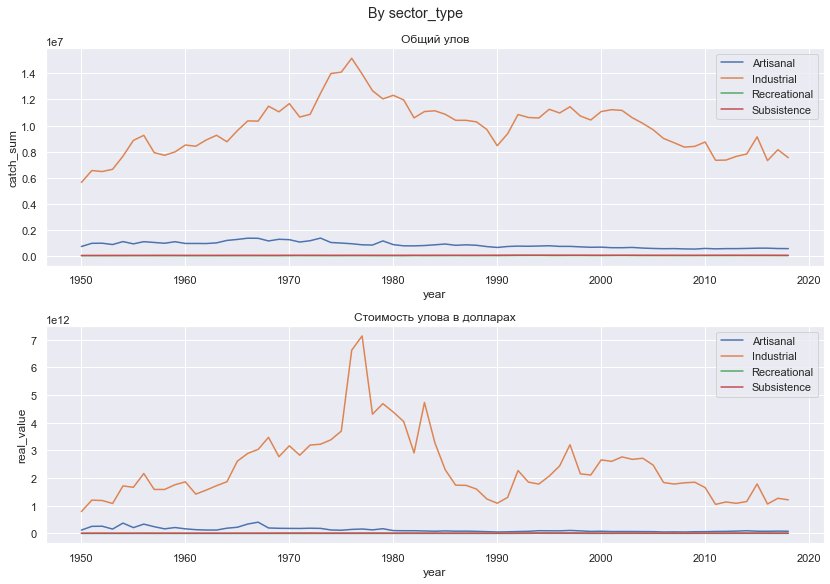

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
a_dav= df.groupby(["sector_type", "year"]).sum().reset_index()
fig, axes = plt.subplots(2, 1)
fig.suptitle('By sector_type')


sns.lineplot(ax=axes[0], data=a_dav, x ="year", y="catch_sum", hue= 'sector_type')
axes[0].set_title('Общий улов')

axes[0].legend(bbox_to_anchor=(1, 1))

sns.lineplot(ax=axes[1],data=a_dav, x ="year", y="real_value", hue= 'sector_type')
axes[1].set_title('Стоимость улова в долларах')

axes[1].legend(bbox_to_anchor=(1, 1))


fig.tight_layout()


plt.show()

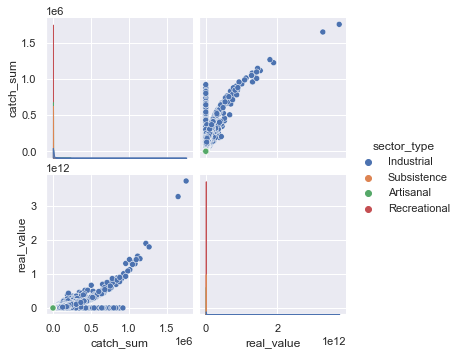

In [42]:
import seaborn as sns
d=df[['sector_type','catch_sum','real_value']]
sns.pairplot(d, hue="sector_type");


**Микровывод:** в основном вылов характеризован индустриальными нуждами, при чем реальная стоимость логарифмически возрастает с ростом вылова


# Анализ по разным коммерческим группам

In [17]:
df['commercial_group'].unique()

array(['Other fishes & inverts', 'Crustaceans', 'Molluscs',
       'Sharks & rays', 'Cod-likes', 'Scorpionfishes', 'Perch-likes',
       'Flatfishes', 'Herring-likes', 'Salmon, smelts, etc',
       'Tuna & billfishes', 'Anchovies'], dtype=object)

Всего 12 групп.

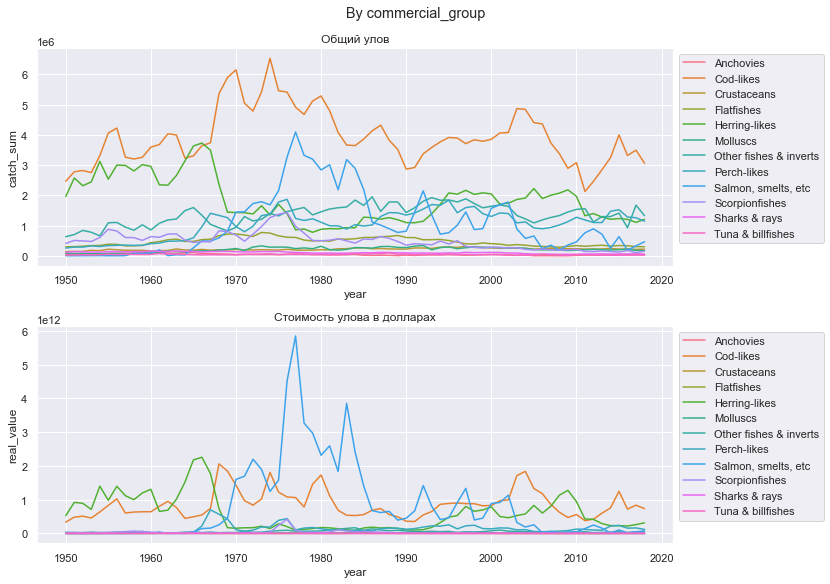

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
b_dav= df.groupby(["commercial_group", "year"]).sum().reset_index()
fig, axes = plt.subplots(2, 1)
fig.suptitle('By commercial_group')


sns.lineplot(ax=axes[0], data=b_dav, x ="year", y="catch_sum", hue= 'commercial_group')
axes[0].set_title('Общий улов')

axes[0].legend(bbox_to_anchor=(1, 1))

sns.lineplot(ax=axes[1],data=b_dav, x ="year", y="real_value", hue= 'commercial_group')
axes[1].set_title('Стоимость улова в долларах')

axes[1].legend(bbox_to_anchor=(1, 1))


fig.tight_layout()
  

plt.show()

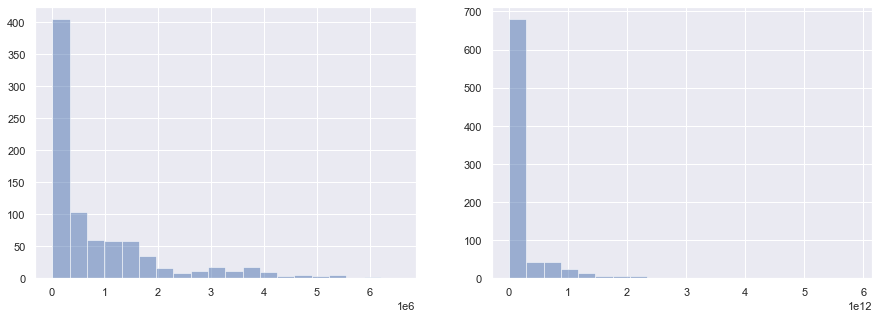

In [19]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(15,5)
axs[0].hist(x=b_dav['catch_sum'],bins=20, alpha=0.5, label='catch sum');

axs[1].hist(x=b_dav['real_value'],bins=20, alpha=0.5, label='real value');
plt.show()

In [20]:
m1=b_dav['catch_sum'].mean()
var1=np.var(b_dav['catch_sum'])
print(m1, var1)

903223.0527951206 1373982502538.2937


In [21]:
m2=b_dav['real_value'].mean()
var2=np.var(b_dav['real_value'])
print(m2, var2)

208990402139.14124 2.5514005931251484e+23


**Микровывод:** димперсия и мат ожидание не равны друг другу следовательно нельзя утверждать что это распрделение Пуасонна.

# Анализ по разным статусам поимки

*Что такое вообще "статус поимки"?* Это по факту то, в каком состоянии дошла рыба до морского порта после вылова. Она может умереть или погибнуть - тогда она выбрасывается и считается как **discard**, либо она живая, целая и невредимая идет дальше на поставку продавцам и потом покупателям **(landing)**.

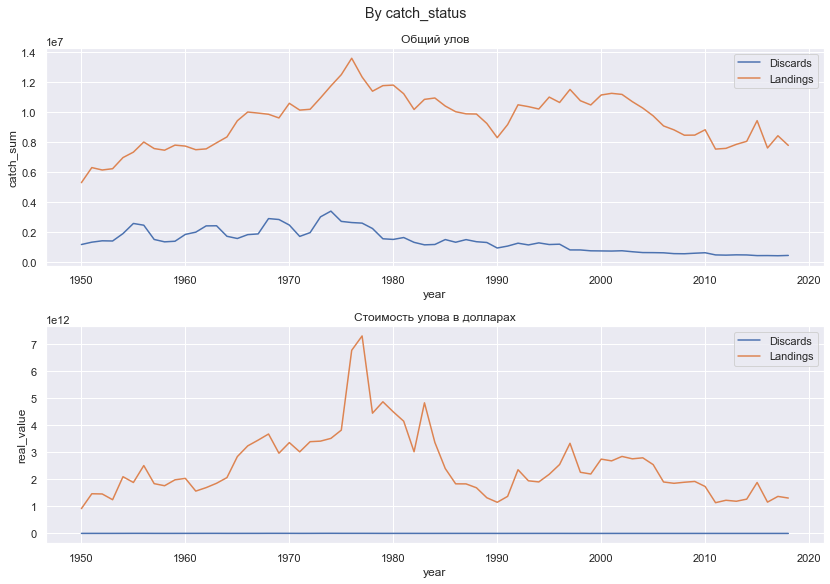

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
с_dav= df.groupby(["catch_status", "year"]).sum().reset_index()
fig, axes = plt.subplots(2, 1)
fig.suptitle('By catch_status')


sns.lineplot(ax=axes[0], data=с_dav, x ="year", y="catch_sum", hue= 'catch_status')
axes[0].set_title('Общий улов')

axes[0].legend(bbox_to_anchor=(1, 1))

sns.lineplot(ax=axes[1],data=с_dav, x ="year", y="real_value", hue= 'catch_status')
axes[1].set_title('Стоимость улова в долларах')

axes[1].legend(bbox_to_anchor=(1, 1))


fig.tight_layout()
  

plt.show()

**Микровывод:** как можно заметить, мертвой рыби во все годы не так много, самые большие интервалы в 1970-е и 1980-е годы. Стоимость выброшенной рыбы очевидно равна нулю, что видно на нижнем графике по всем годам. А стоимость здорового пригодного улова прямо пропорциональная связана с объемом вылова.

In [23]:
hm= df.groupby(["catch_status", "year", "fishing_entity"]).sum().reset_index()
(hm['fishing_entity'].value_counts())

Azores Isl. (Portugal)            138
Iceland                           138
United Kingdom                    138
Sweden                            138
Spain                             138
Russian Federation                138
Norway                            138
Netherlands                       138
Ireland                           138
Portugal                          138
Greenland                         138
France                            138
Denmark                           138
Faeroe Isl. (Denmark)             138
Belgium                           138
Germany                           138
Channel Isl. (UK)                 128
Lithuania                          79
Taiwan                             78
Latvia                             78
Estonia                            77
Unknown Fishing Country            69
Montenegro                         54
Croatia                            54
Japan                              50
China                              50
Poland      

Всего 60 стран в которых вылавливается рыба

<Figure size 1440x1440 with 0 Axes>

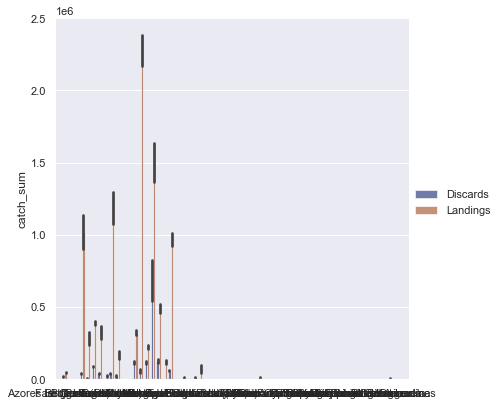

In [24]:
import seaborn as sns
fig=plt.gcf()
fig.set_size_inches(20,20)
g = sns.catplot(
    data=hm, kind="bar",
    x="fishing_entity", y="catch_sum", hue="catch_status", palette="dark", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("", "catch_sum")
g.legend.set_title("")

Даженесмотря на размер выглядит не очень из-за большого количества стран, поэтому построим такую же диаграмму для 10 лидеров-стран с самыми большими данными по вылову


In [25]:
r=df['fishing_entity'].value_counts().nlargest(10)
rdata=df[df['fishing_entity'].isin(r.index)]
rdata

,Unnamed: 0,rfmo_id,rfmo_name,layer_name,year,scientific_name,common_name,functional_group,commercial_group,fishing_entity,sector_type,catch_status,reporting_status,gear_name,catch_sum,real_value
32,32,12,NEAFC,rfmo,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Denmark,Industrial,Discards,Unreported,unknown by source,8.876867,1.301349e+04
33,33,12,NEAFC,rfmo,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Denmark,Industrial,Landings,Reported,pelagic trawl,104.364830,1.529988e+05
34,34,12,NEAFC,rfmo,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Denmark,Industrial,Landings,Reported,purse seine,59.771011,8.762430e+04
35,35,12,NEAFC,rfmo,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Denmark,Industrial,Landings,Reported,mixed gear,1.467143,2.150832e+03
36,36,12,NEAFC,rfmo,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Denmark,Industrial,Landings,Reported,unknown class,0.397016,5.820253e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084097,1084097,12,NEAFC,rfmo,2018,Donax trunculus,Truncate donax,Other demersal invertebrates,Molluscs,Spain,Artisanal,Landings,Reported,artisanal fishing gear,0.012357,3.617894e-01
1084098,1084098,12,NEAFC,rfmo,2018,Nassarius mutabilis,Changeable nassa,Other demersal invertebrates,Molluscs,Spain,Artisanal,Discards,Unreported,artisanal fishing gear,0.000093,1.366447e-01
1084099,1084099,12,NEAFC,rfmo,2018,Nassarius mutabilis,Changeable nassa,Other demersal invertebrates,Molluscs,Spain,Artisanal,Landings,Reported,artisanal fishing gear,0.002191,1.637576e-02
1084100,1084100,12,NEAFC,rfmo,2018,Nassarius mutabilis,Changeable nassa,Other demersal invertebrates,Molluscs,Spain,Artisanal,Landings,Reported,artisanal fishing gear,0.000001,4.102140e-09


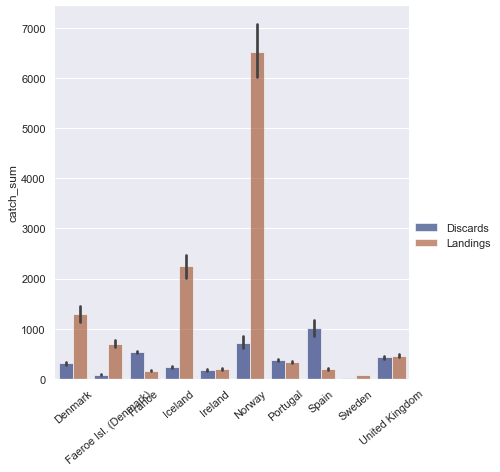

In [26]:
import seaborn as sns
sns.set(rc={'figure.figsize':(100,30)})
g = sns.catplot(
    data=rdata, kind="bar",
    x="fishing_entity", y="catch_sum", hue="catch_status", palette="dark", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("", "catch_sum")
g.legend.set_title("");
g.set_xticklabels(rotation=40)
plt.show()

In [ ]:
import seaborn as sns
rdata1=rdata[['fishing_entity','catch_sum','real_value']]
sns.pairplot(rdata1, hue="fishing_entity");


**Микровывод:** как можно заметить самый большой совокупный улов свежей и востребованной рыбы у Норвегии, далее идет Ирландия и Дания. Испания и Франция находятся в рядах аутсайдеров, т к рыба которую они ловят либо не доживает до порта либо умирает в процессе транспортировки, но совокупный объем умершей рыбы у этих двух стран больше всего. Остальные страны производят хорошую рыбу но не в таких крупных масштабах чем те страны, что были перечислены выше

# Анализ по статусу отчетов 

In [27]:
df['reporting_status'].value_counts()

Reported      667785
Unreported    416317
Name: reporting_status, dtype: int64

**Микровывод:** большая доля выловов является официальной и фигурирует в статистике с официальными отчетами. 

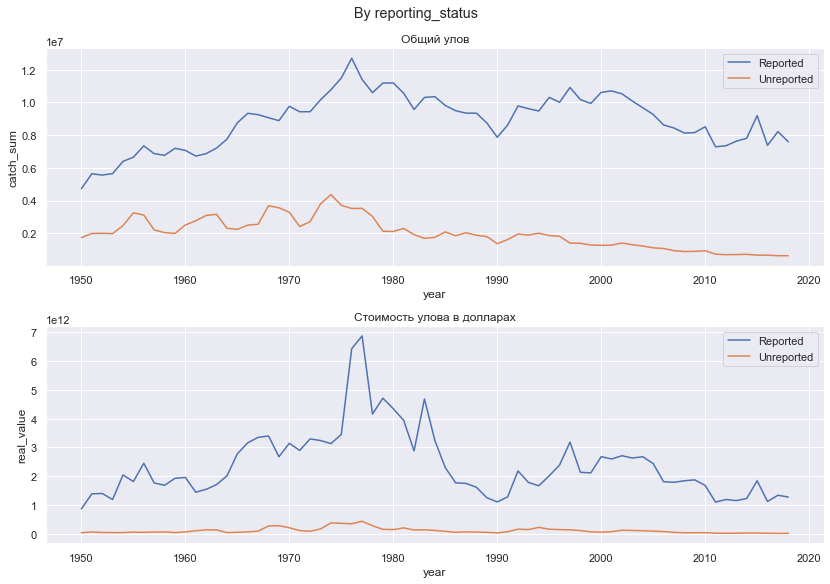

In [28]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
с_dav= df.groupby(["reporting_status", "year"]).sum().reset_index()
fig, axes = plt.subplots(2, 1)
fig.suptitle('By reporting_status')


sns.lineplot(ax=axes[0], data=с_dav, x ="year", y="catch_sum", hue= 'reporting_status')
axes[0].set_title('Общий улов')

axes[0].legend(bbox_to_anchor=(1, 1))

sns.lineplot(ax=axes[1],data=с_dav, x ="year", y="real_value", hue= 'reporting_status')
axes[1].set_title('Стоимость улова в долларах')

axes[1].legend(bbox_to_anchor=(1, 1))


fig.tight_layout()
  

plt.show()

**Микровывод:** в основном все случа вылова регистрируются и лишь малая часть из общего числа не числится в официальной информации. К тому же число неофициальных случаев вылова сокращается к 2020 году достаточно заметно.

# Анализ по инструменту ловли

In [29]:
len(df['gear_name'].unique())

38

Всего 38 различных способов и подходов к ловле рыби и морских продуктов.

C:\Users\08DE~1\AppData\Local\Temp/ipykernel_10376/1088265971.py:18: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout()


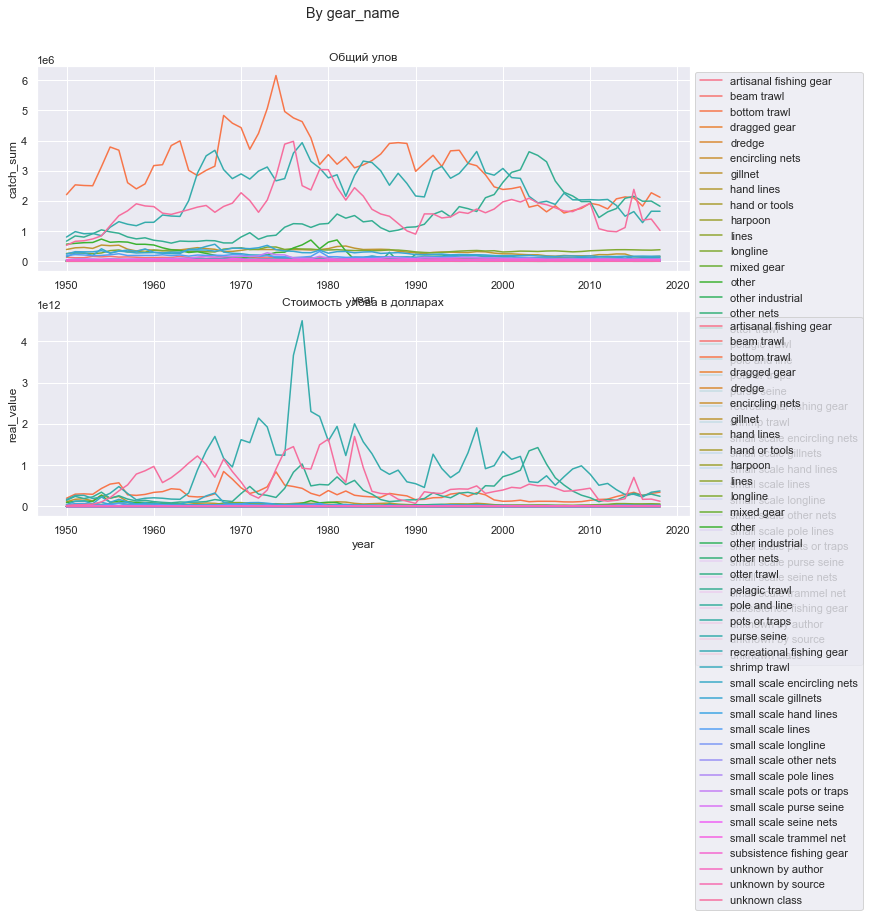

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
с_dav= df.groupby(["gear_name", "year"]).sum().reset_index()
fig, axes = plt.subplots(2, 1)
fig.suptitle('By gear_name')


sns.lineplot(ax=axes[0], data=с_dav, x ="year", y="catch_sum", hue= 'gear_name')
axes[0].set_title('Общий улов')

axes[0].legend(bbox_to_anchor=(1, 1))

sns.lineplot(ax=axes[1],data=с_dav, x ="year", y="real_value", hue= 'gear_name')
axes[1].set_title('Стоимость улова в долларах')

axes[1].legend(bbox_to_anchor=(1, 1))


fig.tight_layout()
  

plt.show()

Поскольку линейных графиков очень много, выделим 10 самых часто используемых и построим графики только по ним

In [31]:
g=df['gear_name'].value_counts().nlargest(10)
gdata=df[df['gear_name'].isin(g.index)]
gdata

,Unnamed: 0,rfmo_id,rfmo_name,layer_name,year,scientific_name,common_name,functional_group,commercial_group,fishing_entity,sector_type,catch_status,reporting_status,gear_name,catch_sum,real_value
0,0,12,NEAFC,rfmo,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Belgium,Industrial,Discards,Unreported,bottom trawl,1082.915358,1.587554e+06
5,5,12,NEAFC,rfmo,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Belgium,Industrial,Discards,Unreported,other,28.864000,4.231462e+04
7,7,12,NEAFC,rfmo,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Belgium,Industrial,Landings,Reported,bottom trawl,301.156871,1.774799e+06
18,18,12,NEAFC,rfmo,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Belgium,Industrial,Landings,Reported,other,0.041543,1.225348e-01
19,19,12,NEAFC,rfmo,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Belgium,Industrial,Landings,Reported,other,0.041543,1.225348e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084097,1084097,12,NEAFC,rfmo,2018,Donax trunculus,Truncate donax,Other demersal invertebrates,Molluscs,Spain,Artisanal,Landings,Reported,artisanal fishing gear,0.012357,3.617894e-01
1084098,1084098,12,NEAFC,rfmo,2018,Nassarius mutabilis,Changeable nassa,Other demersal invertebrates,Molluscs,Spain,Artisanal,Discards,Unreported,artisanal fishing gear,0.000093,1.366447e-01
1084099,1084099,12,NEAFC,rfmo,2018,Nassarius mutabilis,Changeable nassa,Other demersal invertebrates,Molluscs,Spain,Artisanal,Landings,Reported,artisanal fishing gear,0.002191,1.637576e-02
1084100,1084100,12,NEAFC,rfmo,2018,Nassarius mutabilis,Changeable nassa,Other demersal invertebrates,Molluscs,Spain,Artisanal,Landings,Reported,artisanal fishing gear,0.000001,4.102140e-09


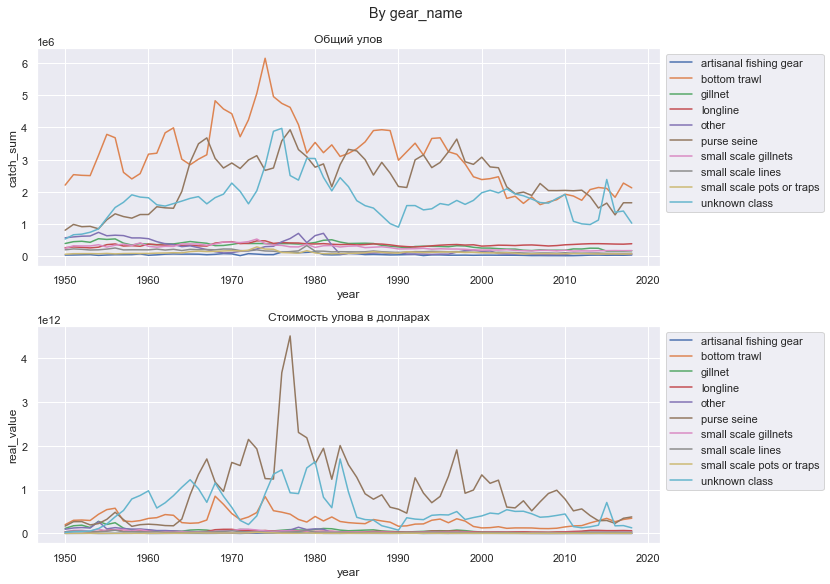

In [32]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
gdata1= gdata.groupby(["gear_name", "year"]).sum().reset_index()
fig, axes = plt.subplots(2, 1)
fig.suptitle('By gear_name')


sns.lineplot(ax=axes[0], data=gdata1, x ="year", y="catch_sum", hue= 'gear_name')
axes[0].set_title('Общий улов')

axes[0].legend(bbox_to_anchor=(1, 1))

sns.lineplot(ax=axes[1],data=gdata1, x ="year", y="real_value", hue= 'gear_name')
axes[1].set_title('Стоимость улова в долларах')

axes[1].legend(bbox_to_anchor=(1, 1))


fig.tight_layout()
  

plt.show()

**Микровывод:** самые большие объемы вылова за счет bottom trawl ("волочение" - установка рыбаловной сети вдоль берега), purse seine ("кошельковый метод" - вылов с помощью сети в виде кошелька, исп. на открытой воде для вылова тунца). 
Однако наибольшую доходность приносят выловы с помощью последнего указанного метода, что можно объяснить более высокой ценой выловленного класса рыбы.

In [33]:
x=gdata[gdata["gear_name"]=='bottom trawl']
xr=x['functional_group'].value_counts().nlargest(10)
xnew=x[x['functional_group'].isin(xr.index)]


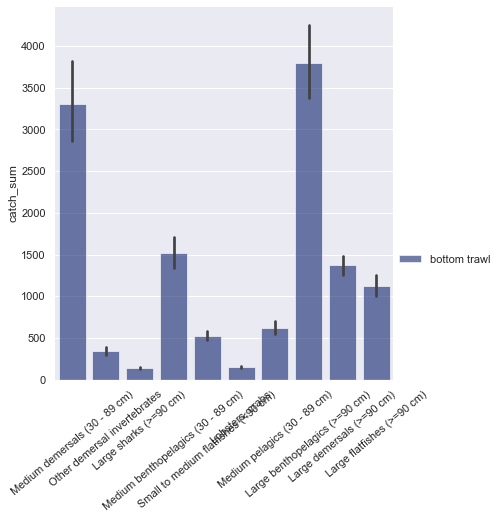

In [34]:
import seaborn as sns
sns.set(rc={'figure.figsize':(100,30)})
g = sns.catplot(
    data=xnew, kind="bar",
    x="functional_group", y="catch_sum", hue="gear_name", palette="dark", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("", "catch_sum")
g.legend.set_title("");
g.set_xticklabels(rotation=40)
plt.show()

**Микровывод:** нарисовали столбчатую диаграмму с оценкой видов рыб, их частотой ловли с помощью метода волочения - выяснили, что самые часто вылавливаемые виды - это средние по размеру донные рыбы и бентапалагические рыбы (глубинные).

In [35]:
ben=df[df['functional_group']=='Large benthopelagics (>=90 cm)']
print(ben['real_value'].mean() )
print(df['real_value'].mean())

469126277.4165205
159619715.64576653


**Микровывод:** посмотрев на среднюю стоимость морепродуктов по выборке и оценив среднюю стоимость глубинных рыб, стало понятно, что их цена в сренем выше чем среднерыночное.

In [36]:
z=gdata[gdata["gear_name"]=='purse seine']
zr=z['functional_group'].value_counts().nlargest(10)
znew=z[z['functional_group'].isin(zr.index)]


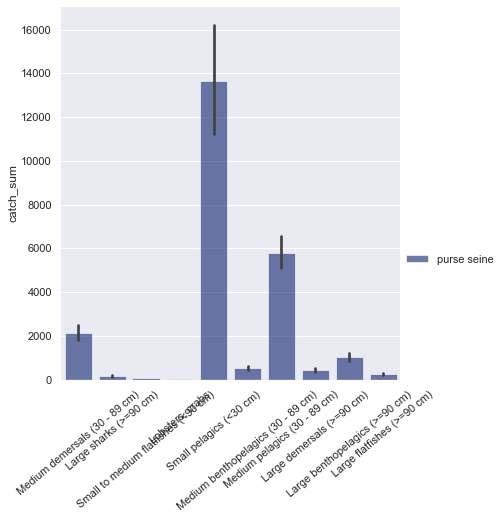

In [37]:
import seaborn as sns
sns.set(rc={'figure.figsize':(100,30)})
g = sns.catplot(
    data=znew, kind="bar",
    x="functional_group", y="catch_sum", hue="gear_name", palette="dark", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("", "catch_sum")
g.legend.set_title("");
g.set_xticklabels(rotation=40)
plt.show()

**Микровывод:** построив идентичную столбчатую диаграмму для кошелькового метода, поняли, что основной целью ловли является мелкая морская рыба до 30 см в длину - это в основном патассу, сельдь, скумбрия, все виды осетровых итд.

In [38]:
bsn=df[df['functional_group']=='Small pelagics (<30 cm)']
print(bsn['real_value'].mean() )
print(df['real_value'].mean())

2525040103.2577467
159619715.64576653


 **Микровывод:** посмотрев на среднюю стоимость морепродуктов по выборке и оценив среднюю стоимость мелких морских рыб, стало понятно, что их цена в среднем выше чем среднерыночное.

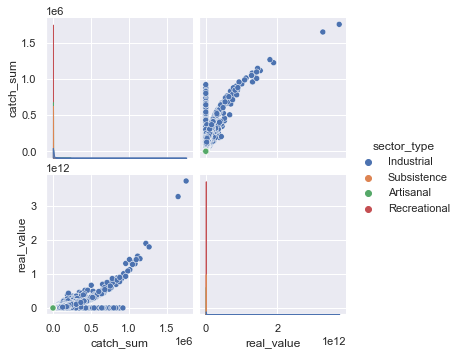